In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Basic Global Thresholding

In [2]:
def global_thresholding(image, max_iteration, stop_condition):
    T = np.mean(image)

    for i in range(max_iteration):
        G1 = image[image>T]
        G2 = image[image<=T]

        mu1 = np.mean(G1)
        mu2 = np.mean(G2)

        new_T = (mu1+mu2)/2

        if abs(new_T - T) < stop_condition:
            break

        T = new_T
    
    segmented = np.uint8(image > T) * 255
    return segmented, T

# Load Image

Threshold value = 148.59159576622076


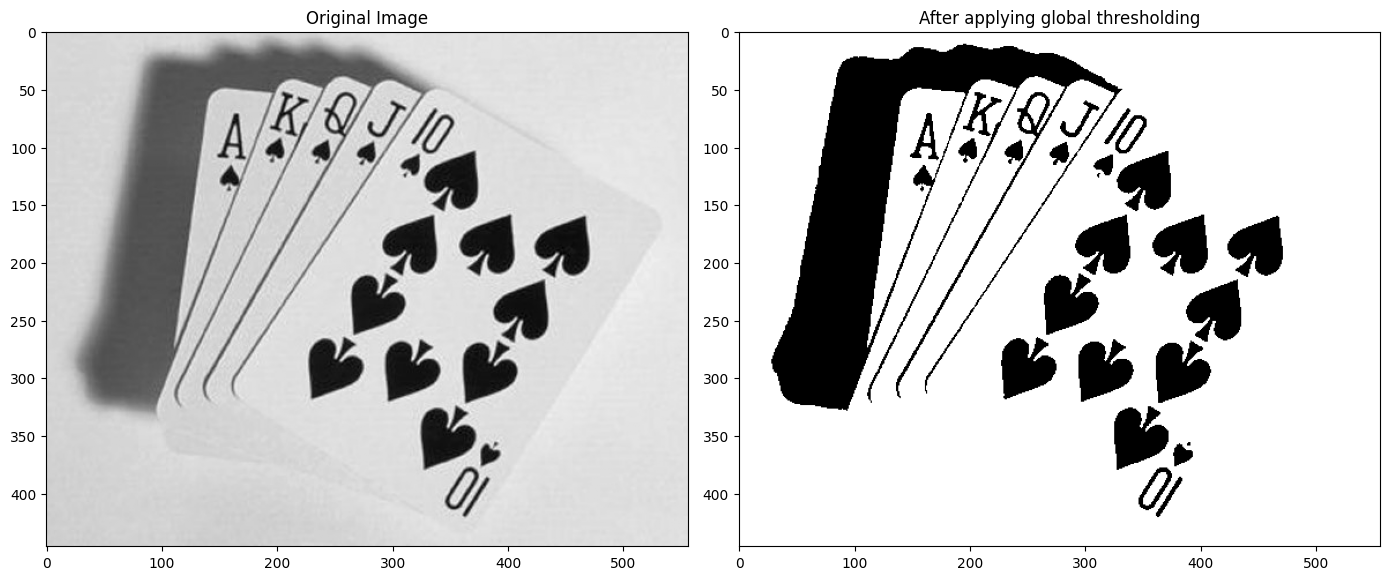

In [4]:
image = cv2.imread('cards.tif', cv2.IMREAD_GRAYSCALE)

segmented_image, threshold = global_thresholding(image, 100, 0.5)

print(f"Threshold value = {threshold}")

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(segmented_image, cmap='gray')
plt.title('After applying global thresholding')

plt.tight_layout()
plt.show()